# Graficos embebidos en Python

Al hablar sobre graficos embebidos en Python y ciencia basica de datos podemos tomar muchas consideraciones.
Ya que un grafico embebido puede ser desde una app de escritorio, hasta un analisis de ciencia de datos en JupyterNotebooks

Existen multiples herramientas de graficos en Python, tanto para generar graficas en general como analisis de datos, como librerias y frameworks que te permiten producir aplicaciones de escritorio con Python, en nuestro haber tenemos cosas como PyGame que hacer videojuegos muy basicos en Python.

Tambien tenemos GTK y PyQt6 que proporcionan interfaces profesionales de desarrollo de interfaces con python, multi plataforma 

## ***Matplotlib***

Es una libreria de visualización de datos basica en cualquier proyecto, que presenta una interfaz simple para visualizar algunos tipos de datos, integrados tanto con pandas como con numpy

Mantiene una sintaxis similar a matlab y es la libreria de graficos mas utilizada a nivel mundial.

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

## Personalización

Matplotlib proporciona muchas funciones para personalizar la apariencia de los gráficos. Para hacerlos mas amenos tanto en 3D como en 2D, son suficientes para registros de graficos planos, como para reportes financieros. Sin embargo tiene algunas limitaciones que analizaremos mas adelante

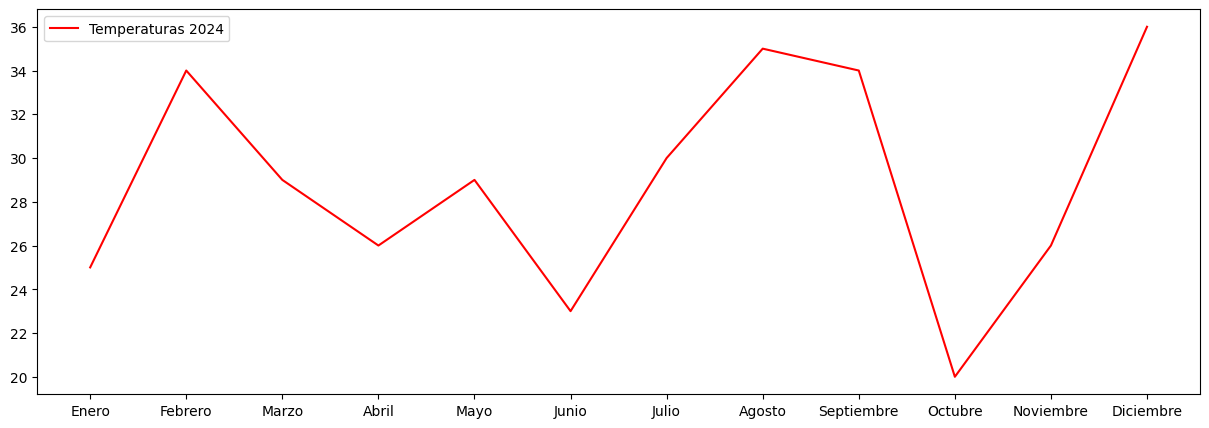

In [2]:
meses = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]
temp = np.random.randint(low=20, high=40, size=12)

temperaturas = pd.Series(temp, meses)

# Configuramos el tamaño del plot
plt.figure(figsize=(15, 5))
# El argumento 'r' configura el color y label='' configura 
plt.plot(temperaturas, 'r', label="Temperaturas 2024")
plt.legend(loc="best")
plt.show()

### Caso de estudio 

Estamos simulando el comportamiento de un cohete de clase 1, es decir con poco impulso total, para lo cual obtenemos datos de altura, angulo de ataque, empuje, alcance horizontal y demas, los cuales podemos representarlos en una sola grafica, tal cual como lo hace el software de simulación de open rocket

Comenzamos importando la data de una simulación hecha en open rocket para poder visualizarla mejor

In [3]:
Altura = pd.read_csv("./Data/Altura-tiempo.csv")
Altura

,Tiempo (s),Altitud (m)
0,0.01,-0.000442
1,0.02,-0.000345
2,0.03,-0.000248
3,0.04,-0.000151
4,0.05,0.000023
...,...,...
185,14.12,7.485000
186,14.62,5.405000
187,15.12,3.322000
188,15.62,1.244000


In [4]:
Distancia = pd.read_csv("./Data/Distancia-tiempo.csv")
Distancia

,Tiempo (s),Distancia lateral (m)
0,0.01,0.000
1,0.02,0.000
2,0.03,0.000
3,0.04,0.000
4,0.05,0.000
...,...,...
185,14.12,16.865
186,14.62,17.957
187,15.12,18.984
188,15.62,19.984


In [5]:
Velocidad = pd.read_csv("./Data/Velocidad-tiempo.csv")
Velocidad

,Tiempo (s),Velocidad total (m/s)
0,0.01,0.088
1,0.02,0.069
2,0.03,0.050
3,0.04,0.030
4,0.05,0.005
...,...,...
185,14.12,4.186
186,14.62,4.135
187,15.12,4.196
188,15.62,4.118


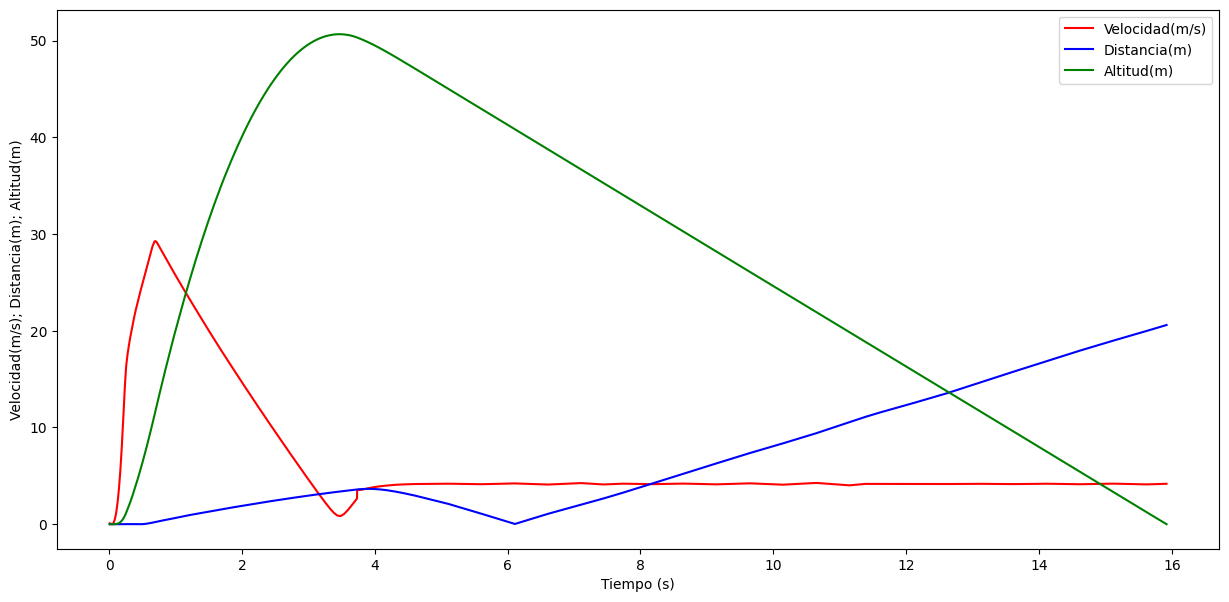

In [6]:
# Graficamos todos los data frames 

plt.figure(figsize=(15, 7))

# Velocidad
plt.plot(Velocidad["Tiempo (s)"], Velocidad["Velocidad total (m/s)"], 'r', label="Velocidad(m/s)")


plt.plot(Distancia["Tiempo (s)"], Distancia["Distancia lateral (m)"], 'b', label="Distancia(m)")

# Altura
plt.plot(Altura["Tiempo (s)"], Altura["Altitud (m)"], 'g', label="Altitud(m)")

# Configuraciones del grafico
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad(m/s); Distancia(m); Altitud(m)")
plt.legend(loc="best")
plt.savefig("Simulacion-1.png")
plt.show()

In [7]:
# Conjuntando todo en un solo data frame
simulacion = pd.DataFrame(Velocidad)
simulacion["Distancia lateral (m)"] = Distancia["Distancia lateral (m)"]
simulacion["Altitud (m)"] = Altura["Altitud (m)"]
simulacion

,Tiempo (s),Velocidad total (m/s),Distancia lateral (m),Altitud (m)
0,0.01,0.088,0.000,-0.000442
1,0.02,0.069,0.000,-0.000345
2,0.03,0.050,0.000,-0.000248
3,0.04,0.030,0.000,-0.000151
4,0.05,0.005,0.000,0.000023
...,...,...,...,...
185,14.12,4.186,16.865,7.485000
186,14.62,4.135,17.957,5.405000
187,15.12,4.196,18.984,3.322000
188,15.62,4.118,19.984,1.244000


Index(['Velocidad total (m/s)', 'Distancia lateral (m)', 'Altitud (m)'], dtype='object')


<Figure size 1500x600 with 0 Axes>

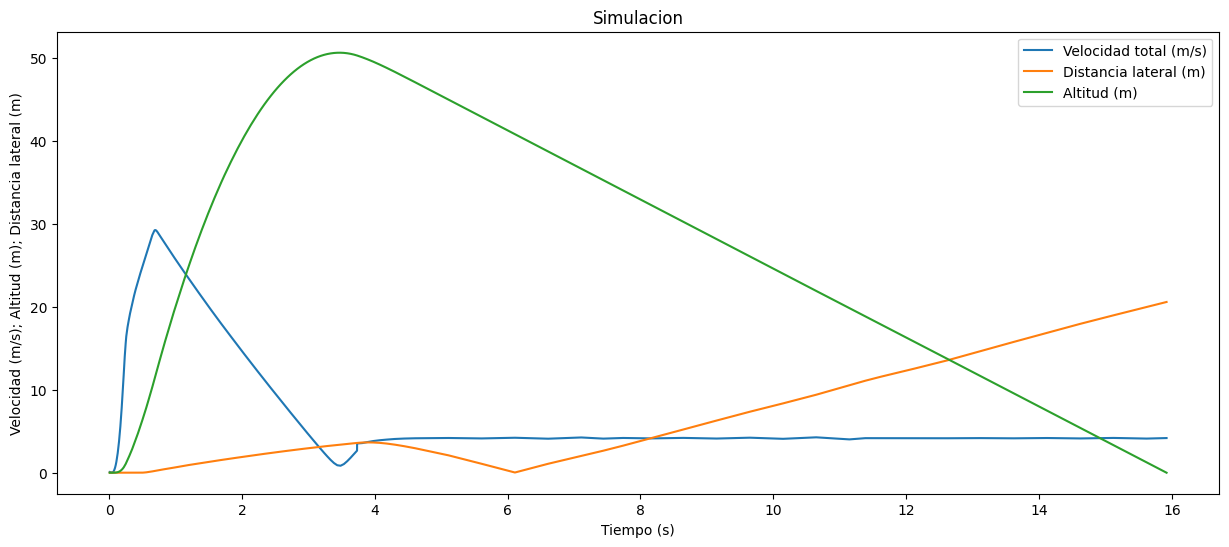

In [8]:
plt.figure(figsize=(15, 6))
etiquetas = simulacion.columns[1:4] # [inicio, final+1] -> [0:n+1], n = len(array)
print(etiquetas)

plt.figure(figsize=(15, 6))

# Trazar cada serie de datos con su etiqueta
for etiqueta in etiquetas:
    plt.plot(simulacion["Tiempo (s)"], simulacion[etiqueta], label=etiqueta)

plt.legend()
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (m/s); Altitud (m); Distancia lateral (m)")
plt.title("Simulacion")
plt.show()

In [9]:
# Obteniendo coordenadas de puntos clave de la simulación

# Altura
altura_max = simulacion["Altitud (m)"].max()
id_altura_max = simulacion["Altitud (m)"].idxmax()
tiempo_altura_max = simulacion["Tiempo (s)"][id_altura_max]

# Velocidad 
vel_max = simulacion["Velocidad total (m/s)"].max()
id_vel_max = simulacion["Velocidad total (m/s)"].idxmax()
tiempo_vel_max = simulacion["Tiempo (s)"][id_vel_max]

# Distancia lateral
alcance = simulacion["Distancia lateral (m)"].sum()

print(f"Altura maxima: {altura_max} m")
print(f"Velocidad maxima: {vel_max} m/s")
print(f"Velocidad maxima: {vel_max / 3.6} km/h")
print(f"Alcance total: {alcance} m")

Altura maxima: 50.662 m
Velocidad maxima: 29.273 m/s
Velocidad maxima: 8.131388888888889 km/h
Alcance total: 418.56224423 m


Index(['Velocidad total (m/s)', 'Distancia lateral (m)', 'Altitud (m)'], dtype='object')


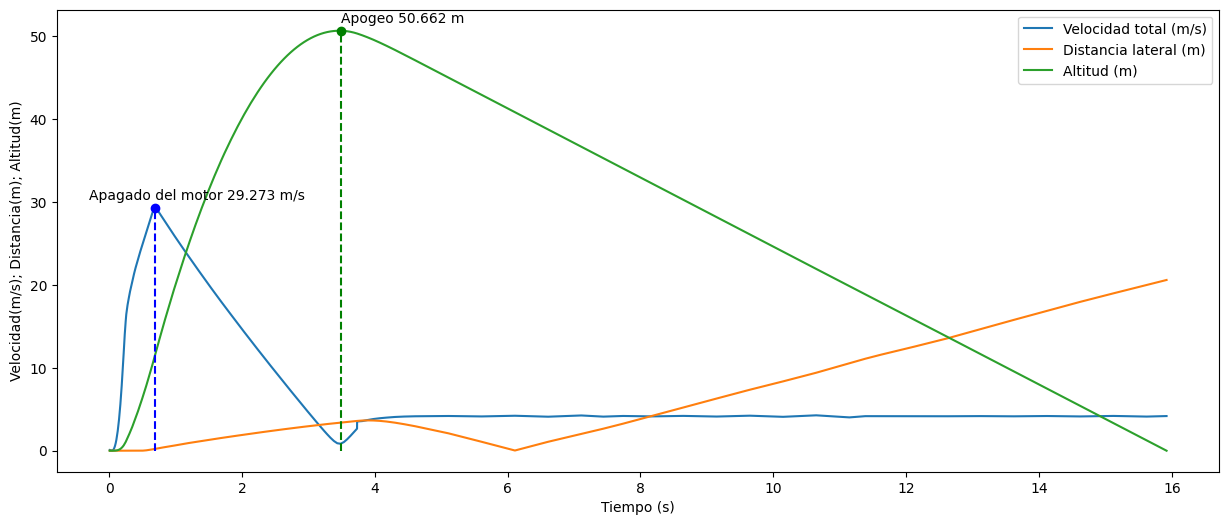

In [10]:
# Graficando pundos importantes

etiquetas = simulacion.columns[1:4] # [inicio, final+1] -> [0:n+1], n = len(array)
print(etiquetas)

plt.figure(figsize=(15, 6))

# Trazar cada serie de datos con su etiqueta
for etiqueta in etiquetas:
    plt.plot(simulacion["Tiempo (s)"], simulacion[etiqueta], label=etiqueta)

plt.plot(tiempo_altura_max, altura_max, 'go')
plt.annotate(f"Apogeo {altura_max} m", xy=(tiempo_altura_max, altura_max), xytext=(tiempo_altura_max, altura_max + 1))
plt.vlines(tiempo_altura_max, 0,altura_max, color='g', linestyle='--')

plt.plot(tiempo_vel_max, vel_max, 'bo')
plt.annotate(f"Apagado del motor {vel_max} m/s", xy=(tiempo_vel_max, vel_max), xytext=(tiempo_vel_max - 1, vel_max + 1))
plt.vlines(tiempo_vel_max, 0, vel_max, color='b', linestyle='--')



plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad(m/s); Distancia(m); Altitud(m)")  # Aquí puedes ajustar la etiqueta del eje Y según corresponda
plt.legend(loc="best")  # Mostrar leyenda con etiquetas
plt.show()

## ***Seaborn***

Es una libreria de visualización de datos que esta basada en matplotlib aunque busca que la presentación de los datos sea de una manera mucho mas sencilla y rapida. En cambio pierdes cierto nivel de personalización de los graficos generados

In [11]:
import seaborn as sns

### Densidad 

La funcion kdeplot de seaborn calcula la estimacion tipo nucleo de la densidad de datos, es decir en que intervalos se acumulan mas datos de nuestra simulacion

<Axes: xlabel='Tiempo (s)', ylabel='Density'>

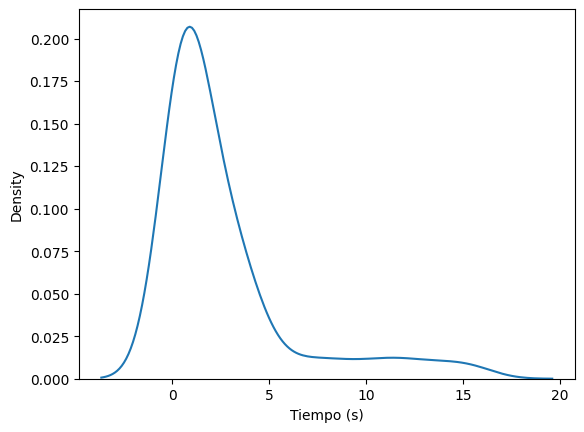

In [12]:
# Graficación de datos con sea born 

sns.kdeplot(x=simulacion["Tiempo (s)"], data=simulacion)

In [13]:
simulacion

,Tiempo (s),Velocidad total (m/s),Distancia lateral (m),Altitud (m)
0,0.01,0.088,0.000,-0.000442
1,0.02,0.069,0.000,-0.000345
2,0.03,0.050,0.000,-0.000248
3,0.04,0.030,0.000,-0.000151
4,0.05,0.005,0.000,0.000023
...,...,...,...,...
185,14.12,4.186,16.865,7.485000
186,14.62,4.135,17.957,5.405000
187,15.12,4.196,18.984,3.322000
188,15.62,4.118,19.984,1.244000


<Axes: xlabel='Tiempo (s)', ylabel='Velocidad total (m/s)'>

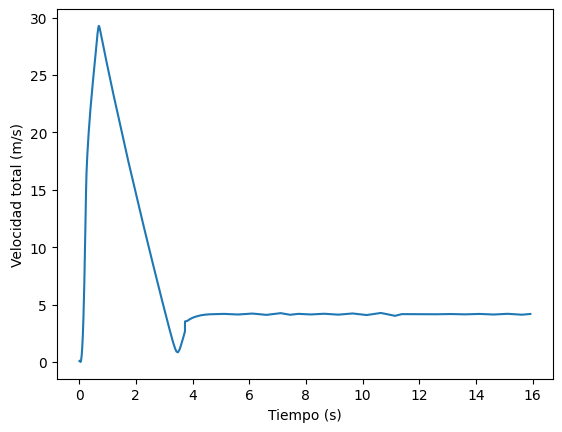

In [14]:
sns.lineplot(x="Tiempo (s)", y="Velocidad total (m/s)", data=simulacion )

<Axes: xlabel='Tiempo (s)', ylabel='Velocidad total (m/s)'>

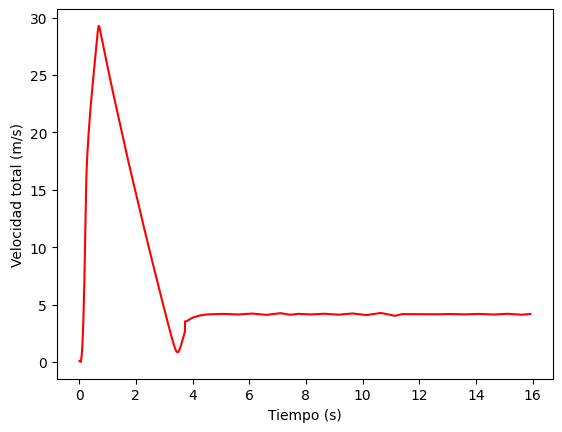

In [15]:
sns.lineplot(x="Tiempo (s)", y="Velocidad total (m/s)", data=simulacion, marker="", color="red")

<Axes: xlabel='Tiempo (s)', ylabel='Velocidad total (m/s)'>

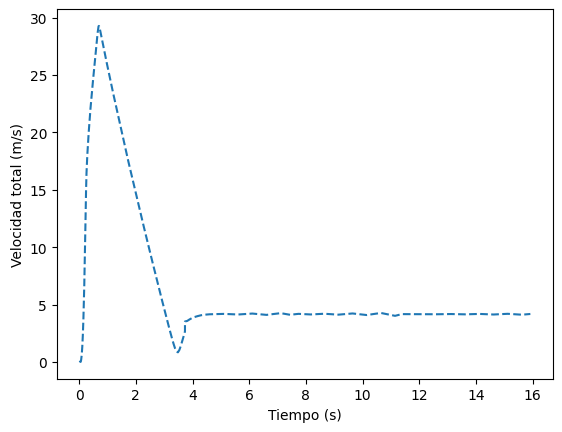

In [16]:
sns.lineplot(x="Tiempo (s)", y="Velocidad total (m/s)", data=simulacion, linestyle="dashed")

<Axes: xlabel='Tiempo (s)', ylabel='Altitud (m)'>

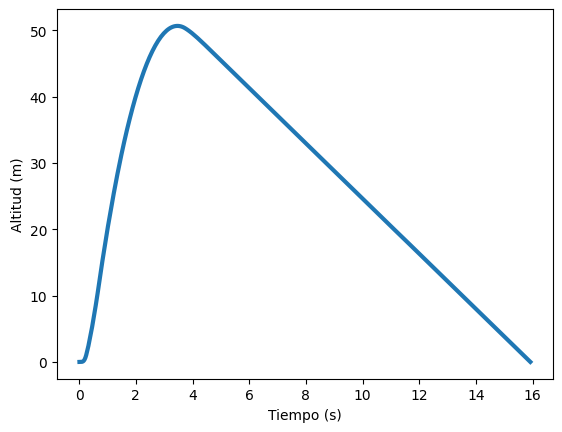

In [17]:
sns.lineplot(x="Tiempo (s)", y="Altitud (m)", data=simulacion, linewidth=3)

Text(0, 0.5, 'Data')

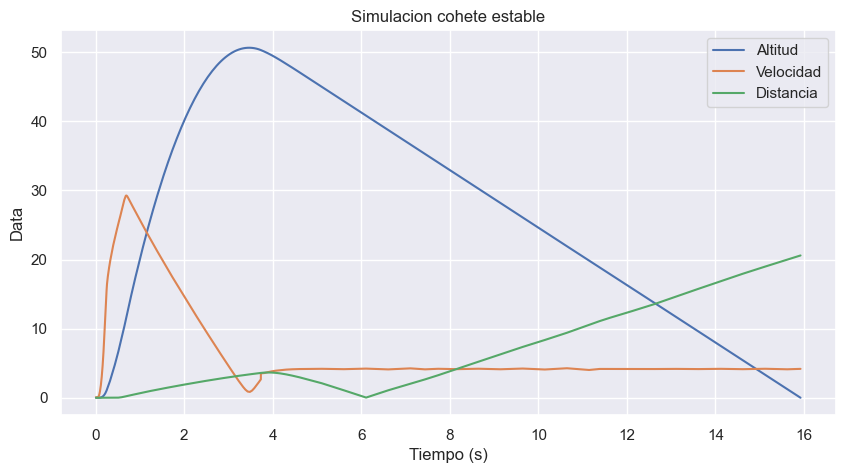

In [18]:
sns.set_theme(style="darkgrid")

plt.figure(figsize=(10,5))
sns.lineplot(x="Tiempo (s)", y="Altitud (m)", data=simulacion, label="Altitud")
sns.lineplot(x="Tiempo (s)", y="Velocidad total (m/s)", data=simulacion, label="Velocidad")
sns.lineplot(x="Tiempo (s)", y="Distancia lateral (m)", data=simulacion, label="Distancia")
plt.title("Simulacion cohete estable")
plt.ylabel("Data")

<Axes: >

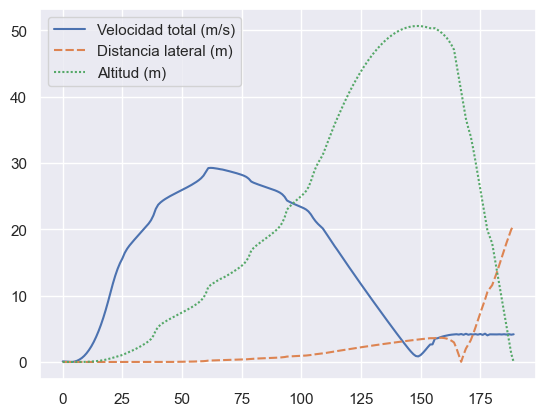

In [19]:
sns.lineplot(data=simulacion.drop(["Tiempo (s)"], axis=1))

# **Ingenieria de propulsion y ciecia de datos**

Una parte importante de la ingenieria de propulsion consiste en obtener el impulso total de la prueba, en base a una curva de empuje, OpenRocket igualmente proporciona una simulación del empuje, aunque esto esta mas enfocado a bancos o estaciones de prueba donde se validan muchas caracteristicas de un motor.

In [25]:
empuje = pd.read_csv("./Data/Empuje.csv")
empuje_max = empuje["Empuje (N)"].max()
print(f"Empuje maximo: {empuje_max} N")

Empuje maximo: 9.655 N


In [22]:
empuje

,Tiempo (s),Empuje (N)
0,0.01,0.062
1,0.02,0.187
2,0.03,0.312
3,0.04,0.437
4,0.05,0.662
...,...,...
185,14.12,0.000
186,14.62,0.000
187,15.12,0.000
188,15.62,0.000


<Axes: xlabel='Tiempo (s)', ylabel='Empuje (N)'>

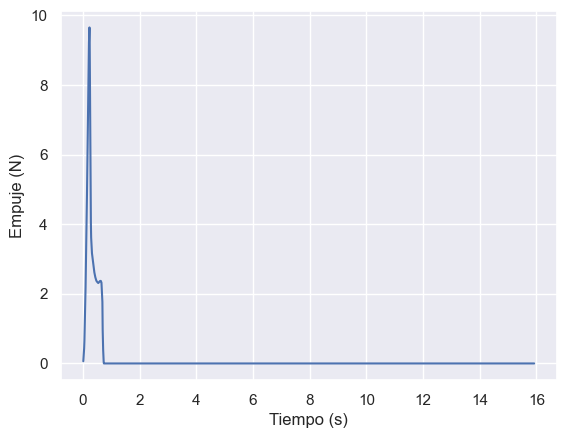

In [23]:
sns.lineplot(x="Tiempo (s)", y="Empuje (N)", data=empuje)

### Filtrando datos

Del empuje no nos interesan realmente los datos que sean menores o iguales a 0, por lo que vamos a obtener unicamente los datos mayores que 0

In [26]:
empuje = empuje[empuje["Empuje (N)"] > 0]
empuje

,Tiempo (s),Empuje (N)
0,0.010,0.062
1,0.020,0.187
2,0.030,0.312
3,0.040,0.437
4,0.050,0.662
...,...,...
63,0.703,0.611
64,0.711,0.386
65,0.718,0.260
66,0.725,0.137


<Axes: xlabel='Tiempo (s)', ylabel='Empuje (N)'>

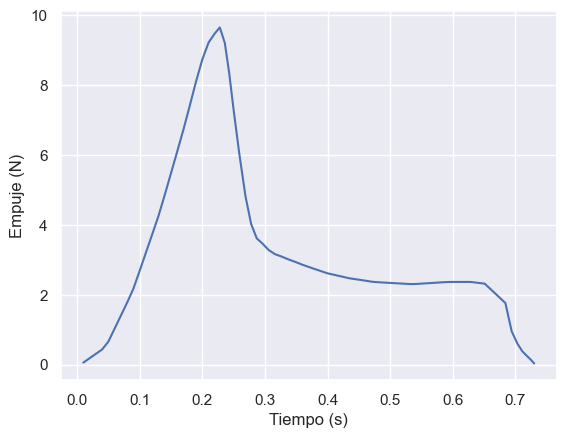

In [27]:
sns.lineplot(x="Tiempo (s)", y="Empuje (N)", data=empuje)

Text(0.5, 1.0, 'Empuje-tiempo')

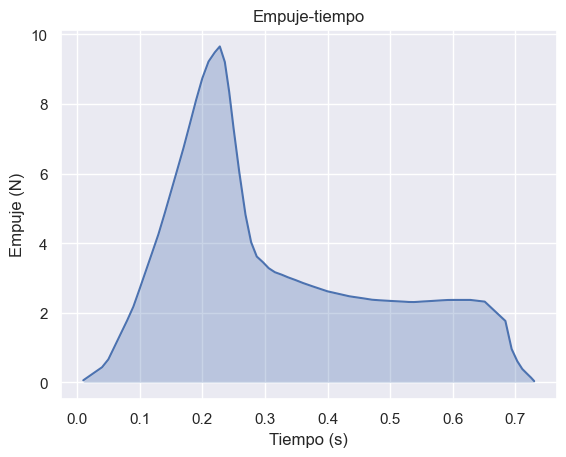

In [28]:
sns.lineplot(x="Tiempo (s)", y="Empuje (N)", data=empuje)
plt.fill_between(empuje["Tiempo (s)"], empuje["Empuje (N)"], alpha=0.3)
plt.title("Empuje-tiempo")

In [30]:
from scipy.integrate import simpson

impulso_total = simpson(y=empuje["Empuje (N)"], x=empuje["Tiempo (s)"])

print(f"El impulso total fue: {impulso_total} Ns")

El impulso total fue: 2.333780386656841 Ns
